# Import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Retrieve tha Data

In [7]:
data = pd.read_csv('Salary_Data.csv')

In [8]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Preparing the data

In [10]:
x = data[['YearsExperience']]
y = data['Salary']

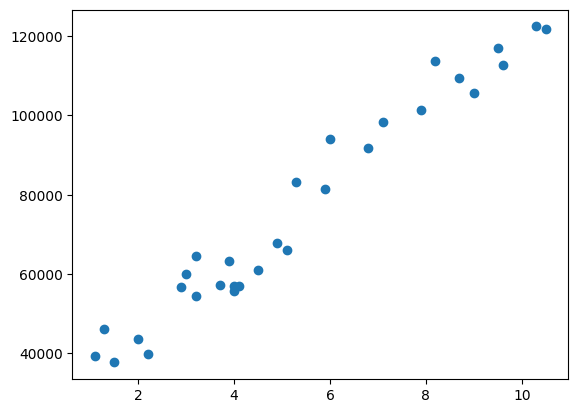

In [11]:
plt.scatter(x,y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0)

# Build and train a model


In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [16]:
regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
print(regressor.coef_)
print(regressor.intercept_)

[9345.94244312]
26816.192244031183


Text(0, 0.5, 'Salary')

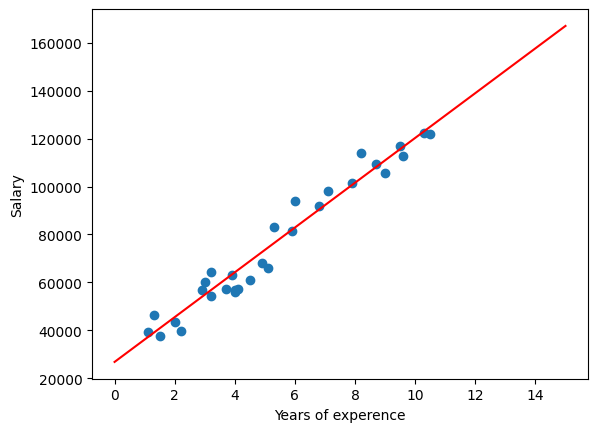

In [21]:
ordonne = np.linspace(0,15,1000)
plt.scatter(x,y)
plt.plot(ordonne,regressor.coef_[0]*ordonne+regressor.intercept_,color='r')
plt.xlabel('Years of experence')
plt.ylabel('Salary')

# Evaluate

In [22]:
y_predict = regressor.predict(X_test)

In [24]:
from sklearn import metrics
print('MAE:' , metrics.mean_absolute_error(y_test, y_predict))
print('MSE:' , metrics.mean_squared_error(y_test, y_predict))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R^2:', metrics.r2_score(y_test, y_predict))

MAE: 3426.4269374307078
MSE: 21026037.329511296
RMSE: 4585.4157204675885
R^2: 0.9749154407708353


In [28]:
NewData = [[5],[4]]
NewTest = pd.DataFrame(NewData, columns=['YearsExperience']) 
y_new = regressor.predict(NewTest)
y_new

array([73545.90445964, 64199.96201652])